# Milestone 2 : Project proposal and initial analyses 🍻

<hr style="clear:both">
This notebook was made for the ADA course at EPFL (CS-401). 

Group : BeerADAventure46

**Authors:** \
[Agatha Hunter](https://people.epfl.ch/agatha.hunter)\
[Anne-Valérie Preto](https://people.epfl.ch/anne-valerie.preto)\
[Tristan Carruzzo](https://people.epfl.ch/tristan.carruzzo)\
[Thamin Maurer](https://people.epfl.ch/thamin.maurer)\
[Victor Dubien](https://people.epfl.ch/victor.dubien)


**Supervisor:**\
[Beatriz Borges](https://people.epfl.ch/beatriz.borges)
<hr style="clear:both">



In [1]:
from utils import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 40)

In [2]:
df = pq.read_table(dataset_path + 'BA_04_complete.parquet').to_pandas()

# Analysis of the beer types
Are the beer type an important cofounder of the beer rating?, and more important than the serving style ? 

In [3]:
display(df)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating,user_country,user_subregion,user_US_state,beer_group
0,142544,37262,Euro Pale Lager,1440064800,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,"From a bottle, pours a piss yellow c...",1,1,2.88,4.5,7820,465,1.199704e+09,Gabon,1,3.250000,2.750000,3.250000,2.750000,3.000000,2.880000,NaN,NaN,NaN,NaN,NaN,NaN,bottle,-0.233333,273,1,3.25,2.750000,3.250000,2.75,3.00,2.880000,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Northern America,Washington,Lagers
1,19590,10093,English Pale Ale,1142247600,mdagnew.19527,4.00,3.50,3.50,4.00,3.50,3.73,500ml Bottle bought from The Vintage...,4,4,3.85,4.5,1797,1143,1.116410e+09,Northern Ireland,5,3.750000,3.625000,3.750000,4.000000,3.875000,3.845000,0.500000,0.250000,0.288675,0.000000,0.478714,0.169411,bottle,0.123039,1088,3,4.00,3.666667,3.833333,4.00,4.00,3.903333,0.000000,0.288675,0.288675,0.000000,0.500000,0.150444,Northern Ireland,Northern Europe,None,Ales
2,19590,10093,English Pale Ale,1101898800,helloloser12345.10867,4.00,3.50,4.00,4.00,4.50,3.98,Serving: 500ml brown bottlePour: Goo...,4,4,3.85,4.5,31,31,1.101380e+09,Northern Ireland,5,3.750000,3.625000,3.750000,4.000000,3.875000,3.845000,0.500000,0.250000,0.288675,0.000000,0.478714,0.169411,bottle,0.200992,30,3,4.00,3.666667,3.833333,4.00,4.00,3.903333,0.000000,0.288675,0.288675,0.000000,0.500000,0.150444,Northern Ireland,Northern Europe,None,Ales
3,19590,10093,English Pale Ale,1093860000,cypressbob.3708,4.00,4.00,4.00,4.00,4.00,4.00,"500ml bottlePours with a light, slig...",4,4,3.85,4.5,604,604,1.069326e+09,Northern Ireland,5,3.750000,3.625000,3.750000,4.000000,3.875000,3.845000,0.500000,0.250000,0.288675,0.000000,0.478714,0.169411,bottle,0.231250,567,3,4.00,3.666667,3.833333,4.00,4.00,3.903333,0.000000,0.288675,0.288675,0.000000,0.500000,0.150444,Northern Ireland,Northern Europe,None,Ales
4,19827,10093,English Pale Ale,1360753200,brewdude1982.691169,4.25,4.50,3.25,3.75,3.75,3.91,This was a 12 oz bottle poured into ...,75,59,3.45,4.8,264,95,1.345802e+09,Northern Ireland,5,3.834746,3.470339,3.521186,3.466102,3.512712,3.504068,0.424493,0.525400,0.553765,0.496665,0.552080,0.411231,bottle,0.225843,70,25,3.87,3.510000,3.510000,3.49,3.54,3.529600,0.427688,0.678847,0.605874,0.570453,0.493077,0.477559,United States of America,Northern America,North Carolina,Ales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137569,19142,885,English India Pale Ale (IPA),1092132000,manekineko.2654,4.00,3.50,4.00,4.00,4.00,3.88,Served on tap at the brewpub in a pi...,2,2,3.24,5.6,428,428,1.060423e+09,"United States, Maryland",13,3.500000,3.250000,3.500000,3.000000,3.500000,3.240000,0.707107,0.353553,0.707107,1.414214,0.707107,0.905097,draft,0.161569,362,1,4.00,3.500000,4.000000,4.00,4.00,3.880000,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Northern America,Virginia,Ales
1137570,19141,885,American Pale Ale (APA),1139482800,scarletlady.49805,4.00,3.00,4.50,3.50,4.00,3.61,Good stuff. The pint arrived with a ...,3,3,3.60,6.8,51,51,1.132312e

In [4]:
# in df beer_group, change the entries to remove ' ' and replace with '_'
df['beer_group'] = df['beer_group'].str.replace(' ', '_')


In [5]:
from scipy.stats import f_oneway
beer_groups = ['Ales', 'Lagers', 'Stouts', 'Wheat_Beers', 'Specialty_and_Unique_Beers', 'Seasonal_and_Celebration_Beers', 'Historical_and_Traditional_Beers', 'Sour_Beers']
# Assuming df is your DataFrame with the relevant columns
f_statistic, p_value = f_oneway(*[df['rating'][df['beer_group'] == group] for group in beer_groups])

print("F-statistic:", f_statistic)
print("P-value:", p_value)



F-statistic: 17077.034561903918
P-value: 0.0


<blockquote>

<b> ANOVA: </b>
- Null Hypothesis (H0): The means of ratings are equal across all beer styles.
- Alternative Hypothesis (H1): At least one mean is different.

From our results, we can reject the null hypothesis and conclude that the means of ratings are not equal across all beer styles!
So the beer group is an important cofounder of the beer rating.

<blockquote>


In [6]:

df_can = df[df['serving_type_rulebased'] == 'can']
df_bottle = df[df['serving_type_rulebased'] == 'bottle']
df_draft = df[df['serving_type_rulebased'] == 'draft']


In [7]:
min_counts_dict = {group: min(df_can['beer_group'].value_counts()[group], df_bottle['beer_group'].value_counts()[group], df_draft['beer_group'].value_counts()[group]) for group in beer_groups}

print(min_counts_dict)


{'Ales': 29159, 'Lagers': 14029, 'Stouts': 5453, 'Wheat_Beers': 2609, 'Specialty_and_Unique_Beers': 2072, 'Seasonal_and_Celebration_Beers': 753, 'Historical_and_Traditional_Beers': 1318, 'Sour_Beers': 669}


In [8]:
dfs = {}

for group in beer_groups:
    #sample_size = min_counts_dict[group]
    sample_size = None
    
    if sample_size is None:
        df_can_group = df_can[df_can['beer_group'] == group]
        df_bottle_group = df_bottle[df_bottle['beer_group'] == group]
        df_draft_group = df_draft[df_draft['beer_group'] == group]
    else:
        df_can_group = df_can[df_can['beer_group'] == group].sample(n=sample_size)
        df_bottle_group = df_bottle[df_bottle['beer_group'] == group].sample(n=sample_size)
        df_draft_group = df_draft[df_draft['beer_group'] == group].sample(n=sample_size)

    dfs[f'df_can_{group}'] = df_can_group
    dfs[f'df_bottle_{group}'] = df_bottle_group
    dfs[f'df_draft_{group}'] = df_draft_group

In [9]:
concatenated_dfs = {}

for group in beer_groups:
    df_can_group = dfs[f'df_can_{group}']
    df_bottle_group = dfs[f'df_bottle_{group}']
    df_draft_group = dfs[f'df_draft_{group}']

    concatenated_dfs[f'df_{group.lower()}'] = pd.concat([df_can_group, df_bottle_group, df_draft_group])


In [10]:
# Create dummy variables for serving_style and beer_group
for group in beer_groups:
    df_group = concatenated_dfs[f'df_{group.lower()}']
    df_group = pd.get_dummies(df_group, columns=['serving_type_rulebased'], drop_first=True)
    concatenated_dfs[f'df_{group.lower()}'] = df_group

In [11]:
df_ales = concatenated_dfs['df_ales']
df_lagers = concatenated_dfs['df_lagers']
df_stouts = concatenated_dfs['df_stouts']
df_wheat_beers = concatenated_dfs['df_wheat_beers']
df_specialty_and_unique_beers = concatenated_dfs['df_specialty_and_unique_beers']
df_seasonal_and_celebration_beers = concatenated_dfs['df_seasonal_and_celebration_beers']
df_historical_and_traditional_beers = concatenated_dfs['df_historical_and_traditional_beers']
df_sour_beers = concatenated_dfs['df_sour_beers']

In [12]:
# Model: rating ~ serving_style_can + serving_style_draft + beer_group_Lagers + ...
model_ales = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_ales).fit()
model_lagers = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_lagers).fit()
model_stouts = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_stouts).fit()
model_wheat = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_wheat_beers).fit()
model_specialty = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_specialty_and_unique_beers).fit()
model_seasonal = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_seasonal_and_celebration_beers).fit()
model_historical = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_historical_and_traditional_beers).fit()
model_sour = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_sour_beers).fit()

# Print the summary of the model
print(model_ales.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     382.4
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          1.12e-166
Time:                        13:07:37   Log-Likelihood:            -3.5073e+05
No. Observations:              456185   AIC:                         7.015e+05
Df Residuals:                  456182   BIC:                         7.015e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [13]:
# create a table with the results of the models, only the intercept, serving_type_rulebased_draft and serving_type_rulebased_can, with the p-value, 
#where each row is a beer_group and the columns are the intercept, serving_type_rulebased_draft and serving_type_rulebased_can values and p-values

# get the values of the intercept, serving_type_rulebased_draft and serving_type_rulebased_can for each model
intercept = [model_ales.params.iloc[0], model_lagers.params.iloc[0], model_stouts.params.iloc[0], model_wheat.params.iloc[0], model_specialty.params.iloc[0], model_seasonal.params.iloc[0], model_historical.params.iloc[0], model_sour.params.iloc[0]]
draft = [model_ales.params.iloc[1], model_lagers.params.iloc[1], model_stouts.params.iloc[1], model_wheat.params.iloc[1], model_specialty.params.iloc[1], model_seasonal.params.iloc[1], model_historical.params.iloc[1], model_sour.params.iloc[1]]
can = [model_ales.params.iloc[2], model_lagers.params.iloc[2], model_stouts.params.iloc[2], model_wheat.params.iloc[2], model_specialty.params.iloc[2], model_seasonal.params.iloc[2], model_historical.params.iloc[2], model_sour.params.iloc[2]]

# get the p-values of the intercept, serving_type_rulebased_draft and serving_type_rulebased_can for each model
intercept_p = [model_ales.pvalues.iloc[0], model_lagers.pvalues.iloc[0], model_stouts.pvalues.iloc[0], model_wheat.pvalues.iloc[0], model_specialty.pvalues.iloc[0], model_seasonal.pvalues.iloc[0], model_historical.pvalues.iloc[0], model_sour.pvalues.iloc[0]]
draft_p = [model_ales.pvalues.iloc[1], model_lagers.pvalues.iloc[1], model_stouts.pvalues.iloc[1], model_wheat.pvalues.iloc[1], model_specialty.pvalues.iloc[1], model_seasonal.pvalues.iloc[1], model_historical.pvalues.iloc[1], model_sour.pvalues.iloc[1]]
can_p = [model_ales.pvalues.iloc[2], model_lagers.pvalues.iloc[2], model_stouts.pvalues.iloc[2], model_wheat.pvalues.iloc[2], model_specialty.pvalues.iloc[2], model_seasonal.pvalues.iloc[2], model_historical.pvalues.iloc[2], model_sour.pvalues.iloc[2]]

# get the standard error of the intercept, serving_type_rulebased_draft and serving_type_rulebased_can for each model
intercept_se = [model_ales.bse.iloc[0], model_lagers.bse.iloc[0], model_stouts.bse.iloc[0], model_wheat.bse.iloc[0], model_specialty.bse.iloc[0], model_seasonal.bse.iloc[0], model_historical.bse.iloc[0], model_sour.bse.iloc[0]]
draft_se = [model_ales.bse.iloc[1], model_lagers.bse.iloc[1], model_stouts.bse.iloc[1], model_wheat.bse.iloc[1], model_specialty.bse.iloc[1], model_seasonal.bse.iloc[1], model_historical.bse.iloc[1], model_sour.bse.iloc[1]]
can_se = [model_ales.bse.iloc[2], model_lagers.bse.iloc[2], model_stouts.bse.iloc[2], model_wheat.bse.iloc[2], model_specialty.bse.iloc[2], model_seasonal.bse.iloc[2], model_historical.bse.iloc[2], model_sour.bse.iloc[2]]

# create a dataframe with the values and p-values
df_models = pd.DataFrame({'intercept': intercept, 'draft': draft, 'can': can, 'intercept_p': intercept_p, 'draft_p': draft_p, 'can_p': can_p, 'intercept_se': intercept_se, 'draft_se': draft_se, 'can_se': can_se}, index=['Ales', 'Lagers', 'Stouts', 'Wheat', 'Specialty', 'Seasonal', 'Historical', 'Sour'])
display(df_models)

,intercept,draft,can,intercept_p,draft_p,can_p,intercept_se,draft_se,can_se
Ales,3.833210,0.048355,0.008871,0.0,1.379711e-167,5.592186e-03,0.000951,0.001752,0.003201
Lagers,3.313690,0.225944,-0.312284,0.0,0.000000e+00,0.000000e+00,0.002792,0.005837,0.006805
Stouts,4.039578,0.025381,-0.055148,0.0,2.501268e-14,1.038073e-13,0.001591,0.003330,0.007416
Wheat,3.730723,0.050602,-0.082402,0.0,3.354895e-22,5.034449e-13,0.002705,0.005221,0.011404
Specialty,3.574541,0.158824,-0.312751,0.0,3.587765e-100,3.192064e-92,0.003443,0.007459,0.015324
Seasonal,3.770330,0.018053,-0.145203,0.0,1.531335e-02,1.924255e-13,0.003367,0.007444,0.019737
Historical,3.899660,0.016589,-0.130024,0.0,2.052768e-02,4.426159e-19,0.003163,0.007161,0.014559
Sour,4.040671,-0.020711,-0.154393,0.0,1.621109e-02,9.005252e-14,0.003519,0.008614,0.020700


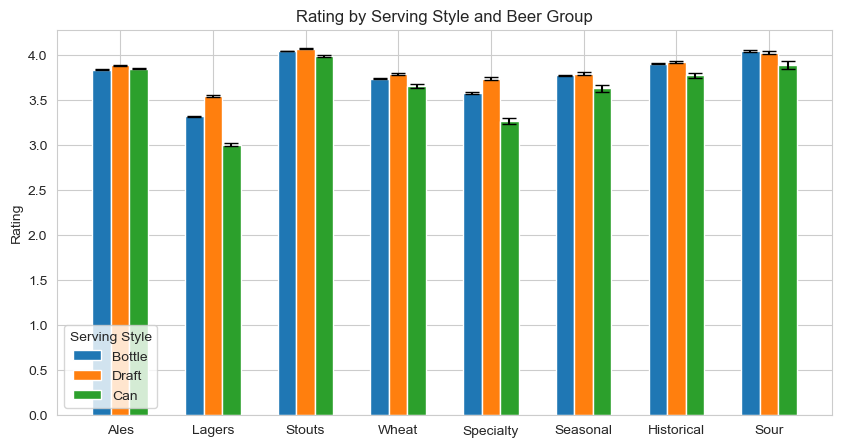

In [14]:

fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(df_models))
width = 0.2

# Plotting bars with labels and error bars
ax.bar(x - width, df_models['intercept'], width, label='Bottle', yerr=1.96 * df_models['intercept_se'], capsize=5)
ax.bar(x, df_models['intercept'] + df_models['draft'], width, label='Draft', yerr=1.96 * df_models['draft_se'], capsize=5)
ax.bar(x + width, df_models['intercept'] + df_models['can'], width, label='Can', yerr=1.96 * df_models['can_se'], capsize=5)

# Setting labels and title
ax.set_ylabel('Rating')
ax.set_title('Rating by Serving Style and Beer Group')
ax.set_xticks(x)
ax.set_xticklabels(df_models.index)

# Adding legend with a title
ax.legend(title='Serving Style')

# Show the plot
plt.show()
